# Shooting method


This live script illustrates the shooting method in the context of finding 
a solution to the optimality conditions of the Pontryagin's maximum principle 
(PMP). To this effect, we consider the following example.

Consider a particle of mass $m$  acted upon by a thrust force of magnitude 
$m$ and described by the following equations, where the angle $\beta$ determines 
the thrust direction   

$$
\begin{align}
\dot{u} & = \cos (\beta) \\
\dot{v} & = \sin (\beta) \\
\dot{x} & = u \\
\dot{y} & = v
\end{align}
$$

Suppose that the initial position of the particle at time $t=0$  is  $(y(0),x(0))=(0,0)$and 
the initial velocity is zero. We wish to transfer the particle to a path parallel 
to the x-axis, a distance $h$ away, in a given time $T$, arriving with the maximum 
value of $x(T)$. We do not care what the final velocity $u(T)$ is. Suppose that 
$h=1$ and $T=3$.

The setup is illustrated in Figure 1.

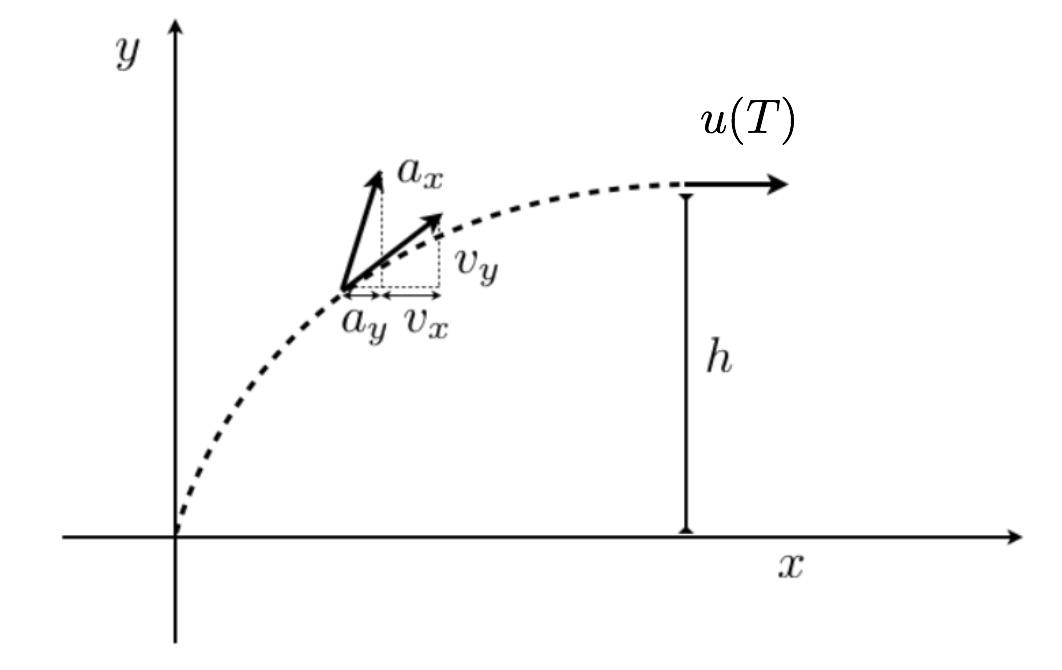

<center>Figure 1: Problem setting</center>

We can formulate this problem in the standard framework of continous-time 
optimal control problems

$$\begin{array}{l}{\min \underbrace{-x(T)}_{g_{T}(\underline{x}(T))}} \\ 
{\quad \dot{\underline{x}}=f(\underline{x}, \underline{u})}\end{array}$$

where

$$f(\underline{x}, \underline{u})=\left[\begin{array}{c}{u} \\ {v} \\ {\cos 
(\beta)} \\ {\sin (\beta)}\end{array}\right] \quad \underline{x}=\left[\begin{array}{l}{x} 
\\ {y} \\ {u} \\ {v}\end{array}\right] \quad \underline{u}=\beta$$

and the running cost is zero ($g(\underline{x}, \underline{u})=0$).

The terminal conditions are (only two terminal states are specified - two 
additional constraints on the terminal co-states associated with the unrestricted 
states):

$$y(T)=h \quad v(T)=0 \quad \lambda_{x}(T)=\frac{\partial g_{T}(\underline{x}(T))}{\partial 
x}=-1 \quad \lambda_{u}(T)=\frac{\partial g_{T}(\underline{x}(T))}{\partial 
u}=0$$

The Hamiltonian is then given by

$$H(\underline{x}, \underline{u}, \lambda)=\lambda_{x} u+\lambda_{y} v+\lambda_{u} 
\cos (\beta)+\lambda_{v} \sin (\beta)$$

where $\lambda=\left[\begin{array}{llll}{\lambda_{x}} & {\lambda_{y}} & 
{\lambda_{u}} & {\lambda_{v}}\end{array}\right]^{\top}$. Let us write the 
PMP optimality conditions (the following three equations besides the initial 
and terminal conditions)

$$\frac{\partial H}{\partial \underline{u}}(\underline{x}, \underline{u}, 
\lambda)=0 \longrightarrow-\lambda_{u} \sin (\beta)+\lambda_{v} \cos (\beta)=0 
\longrightarrow \beta=\arctan \left(\frac{\lambda_{v}}{\lambda_{u}}\right)$$$$\dot{\lambda}(t)=-\left[\frac{\partial}{\partial 
\underline{x}} H\right]^{\top}=-\left[\begin{array}{cccc}{\frac{\partial}{\partial 
x} H} & {\frac{\partial}{\partial y} H} & {\frac{\partial}{\partial u} H} & 
{\frac{\partial}{\partial v} H}\end{array}\right]^{\top} \longrightarrow\left[\begin{array}{c}{\dot{\lambda}_{x}(t)} 
\\ {\dot{\lambda}_{y}(t)} \\ {\dot{\lambda}_{u}(t)} \\ {\dot{\lambda}_{v}(t)}\end{array}\right]=\left[\begin{array}{c}{0} 
\\ {0} \\ {-\lambda_{x}(t)} \\ {-\lambda_{y}(t)}\end{array}\right]$$

$$\left[\begin{array}{c}{\dot{x}(t)} \\ {\dot{y}(t)} \\ {\dot{u}(t)} \\ 
{\dot{v}(t)}\end{array}\right]=\left[\begin{array}{c}{u(t)} \\ {v(t)} \\ {\cos 
\left(\arctan \left(\frac{\lambda_{v}(t)}{\lambda_{u}(t)}\right)\right)} \\ 
{\sin \left(\arctan \left(\frac{\lambda_{v}(t)}{\lambda_{(t)}}\right)\right)}\end{array}\right]=\left[\begin{array}{c}{u(t)} 
\\ {v(t)} \\ {\frac{1}{\sqrt{1+\left(\frac{\lambda v}{\lambda u}\right)^{2}}}} 
\\ {\frac{\frac{\lambda v(t)}{\lambda u(t)}}{\sqrt{1+\left(\frac{\lambda v}{\lambda 
u(t)}\right)^{2}}}}\end{array}\right]$$

where we used the fact that $\cos (\arctan (x))=\frac{1}{\sqrt{1+x^{2}}}, 
\quad \sin (\arctan (x))=\frac{x}{\sqrt{1+x^{2}}}$.

A direct application of the shooting method would lead us to search in a four-dimensional 
space (initial condition of co-state). However, we already know that:                        

$$\dot{\lambda}_{x}(t)=0 \quad \lambda_{x}(T)=-1  \rightarrow \lambda_{x}(0)=-1 
\\ \dot{\lambda}_{u}(t)=-\lambda_{x}(t), \quad \lambda_{u}(3)=0  \longrightarrow 
\lambda_{u}(t)=t-3 \longrightarrow \lambda_{u}(0)=-3 $$

Therefore we just need to search for $\lambda_{y}(0), \quad \lambda_{v}(0)$ to satisfy $y(T)=h \quad v(T)=0$.

Moreover, note that $\lambda_{v}(t)=\lambda_{v}(0)-\lambda_{y}(0) t$ and then

$$ \dot{y}(t) =v(t) \\ \dot{v}(t) =\frac{\frac{\lambda_{v}(0)-\lambda_{y}(0) 
t}{t-3}}{\sqrt{1+\left(\frac{\lambda_{v}(0)-\lambda_{v}(0) t}{t-3}\right)^{2}}} 
$$

The shooting method boils down to find $\lambda_{y}(0), \quad \lambda_{v}(0)$ to satisfy $y(T)=h \quad v(T)=0$ after integrating from $0$ to $T=3$ this equation. This is implemented in the next script using an exhaustive search for $\lambda_{y}(0), \quad \lambda_{v}(0)$.

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
# xdot of the dynamic model of the particle
def dyn(t,xl,l):
    b = l[1]
    a = l[0]
    xldot = np.hstack((xl[1], ((a-b*t))/np.sqrt( (t-3)**2+((a-b*t))**2 )))
    return  xldot

In [ ]:
# solve the 2n nonlinear differential equations for given values of labmday 
# and lambdaz
def shoot(l1,l2):
    xl0 = [0, 0]
    l = np.array([[l1], [l2]])
    tvec = np.arange(0,3.1,0.1)
    sol = solve_ivp(lambda t,xl : dyn(t,xl,l) , [0,3], xl0, t_eval=tvec, method='RK45')
    x2 = sol.y[0]
    v2 = sol.y[1]
    return x2, v2

In [ ]:
# this is the range of search values for lambday(0) and lambdav(0)
lygrid = np.arange(0.5,1.81,0.01)
lzgrid = np.arange(0.5,1.81,0.01)
cost = np.zeros((lygrid.shape[0], lzgrid.shape[0]))
for k1 in range(lygrid.shape[0]):
    for k2 in range(lzgrid.shape[0]):
        # shoot computes a trajectory
        x2, v2 = shoot(lygrid[k1], lzgrid[k2])
        # this cost is simply to evaluate how far from the desired terminal
        # constraints the trajectory computed by the shooting method is
        cost[k1,k2] = (x2[-1]-1)**2 + v2[-1]**2

In [ ]:
# take the index corresponding to lambday(0) and lambdav(0) that best achieves the
# terminal constraints
k1min, k2min = np.unravel_index(np.argmin(cost), cost.shape)
#'shoot' i.e. obtain state and input trajectories for these lambday(0) and lambdav(0)
x_,v = shoot(lygrid[k1min],lzgrid[k2min])

In [ ]:
# plots
tvec = np.arange(0,3.1,0.1)
f = plt.figure()
ax = f.gca()
ax.plot(tvec,x_)
ax.grid(True)

In [ ]:
f = plt.figure()
ax = f.gca()
ax.plot(tvec,v)
ax.grid(True)